In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

,amount
date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


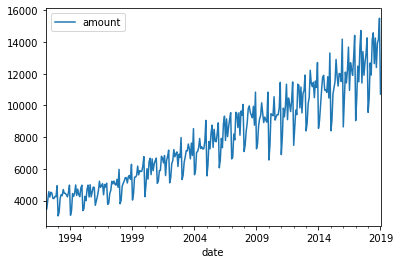

In [2]:
df = pd.read_csv("Alcohol_Sales.csv", index_col='date', parse_dates=True)
df.plot()
df.head()

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
df = scaler.fit_transform(df)
print(df[:5])

[[0.03431412]
 [0.03423395]
 [0.07784815]
 [0.12290548]
 [0.09540608]]


In [5]:
train = df[:250]
test = df[250:]
print(train[:3])
print(test[:3])

[[0.03431412]
 [0.03423395]
 [0.07784815]]
[[0.63513188]
 [0.71281969]
 [0.43004891]]


In [6]:
def split(dt):
  X = []
  y = []
  for i in range(len(dt)-5):
    row = [x for x in dt[i:i+5]]
    X.append(row)
    y.append(dt[i+5])
  return np.array(X), np.array(y)

In [7]:
n_steps = 5
n_features = 1

In [8]:
X_train, y_train = split(train)
print(X_train.shape)
print(X_train[:2])
print(y_train.shape)
print(y_train[:2])

(245, 5, 1)
[[[0.03431412]
  [0.03423395]
  [0.07784815]
  [0.12290548]
  [0.09540608]]

 [[0.03423395]
  [0.07784815]
  [0.12290548]
  [0.09540608]
  [0.12009941]]]
(245, 1)
[[0.12009941]
 [0.1150485 ]]


In [9]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [10]:
X_test, y_test = split(test)
print(X_test.shape)
print(X_test[:2])
print(y_test.shape)
print(y_test[:2])

(70, 5, 1)
[[[0.63513188]
  [0.71281969]
  [0.43004891]
  [0.46957428]
  [0.5675459 ]]

 [[0.71281969]
  [0.43004891]
  [0.46957428]
  [0.5675459 ]
  [0.59825222]]]
(70, 1)
[[0.59825222]
 [0.73655095]]


In [11]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
#Stacked LSTM

In [14]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
8/8 [==============================] - 3s 8ms/step - loss: 0.1067
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0804
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0534
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0268
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0162
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0125
Epoch 8/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 9/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 11/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 12/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 13/50
8/8 [==============================] - 0s 8ms/step - loss: 0

In [17]:
prediction = model.predict(X_test, verbose=0)

In [18]:
print(prediction[:5])
print(y_test[:5])

[[0.5652858 ]
 [0.5439639 ]
 [0.5163315 ]
 [0.5721779 ]
 [0.62394637]]
[[0.59825222]
 [0.73655095]
 [0.6697667 ]
 [0.65381223]
 [0.67594003]]


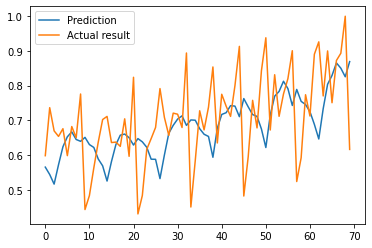

In [19]:
x = range(len(prediction))
plt.plot(x, prediction, label = "Prediction")
plt.plot(x, y_test, label = "Actual result")
plt.legend()
plt.show()

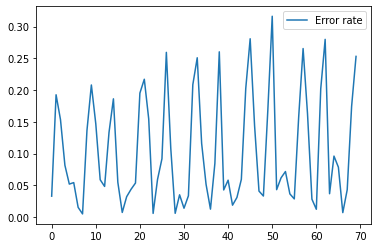

In [20]:
plt.plot(x, abs(y_test-prediction), label = "Error rate")
plt.legend()
plt.show()

In [21]:
#Bidirectional LSTM

In [22]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
8/8 [==============================] - 2s 6ms/step - loss: 0.0787
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0426
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 8/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0081
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 11/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 12/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 13/50
8/8 [==============================] - 0s 6ms/step - loss: 0.

In [25]:
prediction = model.predict(X_test, verbose=0)

In [26]:
print(prediction[:5])
print(y_test[:5])

[[0.5458925 ]
 [0.5407279 ]
 [0.5490212 ]
 [0.59167564]
 [0.6237025 ]]
[[0.59825222]
 [0.73655095]
 [0.6697667 ]
 [0.65381223]
 [0.67594003]]


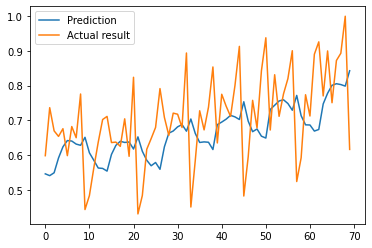

In [27]:
x = range(len(prediction))
plt.plot(x, prediction, label = "Prediction")
plt.plot(x, y_test, label = "Actual result")
plt.legend()
plt.show()

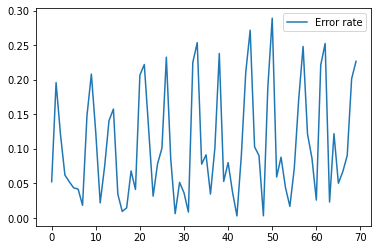

In [28]:
plt.plot(x, abs(y_test-prediction), label = "Error rate")
plt.legend()
plt.show()

In [29]:
#Vanilla LSTM

In [30]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 4ms/step - loss: 0.1215
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0750
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0422
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0204
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 11/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 12/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 13/50
8/8 [==============================] - 0s 4ms/step - loss: 0.

In [33]:
prediction = model.predict(X_test, verbose=0)

In [34]:
print(prediction[:5])
print(y_test[:5])

[[0.5630017 ]
 [0.5546367 ]
 [0.56118023]
 [0.612994  ]
 [0.6510887 ]]
[[0.59825222]
 [0.73655095]
 [0.6697667 ]
 [0.65381223]
 [0.67594003]]


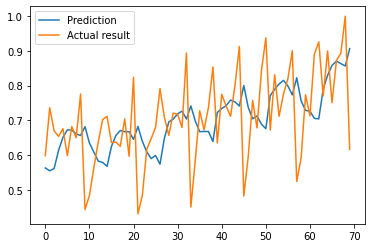

In [35]:
x = range(len(prediction))
plt.plot(x, prediction, label = "Prediction")
plt.plot(x, y_test, label = "Actual result")
plt.legend()
plt.show()

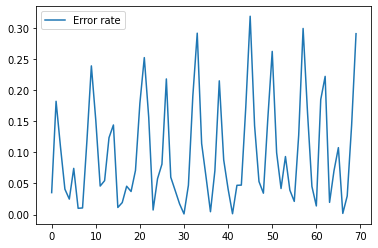

In [36]:
plt.plot(x, abs(y_test-prediction), label = "Error rate")
plt.legend()
plt.show()